# Task-1
## Prediction Using Supervised ML

### Author : Tanaya Modak 

##### Problem Statement - Prediction of student's percentage based on the number of study hours.

In [1]:
#First, We will import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
#Setting Seaborn style 
sns.set_style("whitegrid");

In [3]:
#Import and read the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Let's see the the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


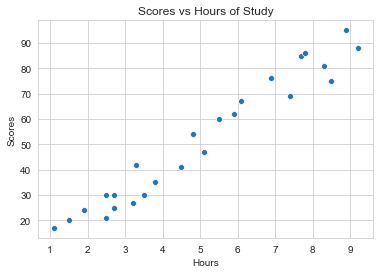

In [6]:
#Let's plot the data to see the pattern
sns.scatterplot(x = "Hours",
                y = "Scores",
                data = df)
plt.title("Scores vs Hours of Study")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### From the plot, we can say that, the more a student studies, the more chances of him/her getting good scores. This scatterplot confirms the data is linear. Now, let's again plot the data with regression line. 

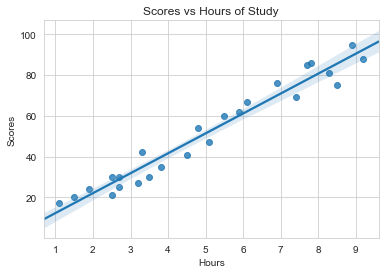

In [7]:
sns.regplot(x = "Hours",
            y = "Scores",
            data = df)
plt.title("Scores vs Hours of Study")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [11]:
#Let's check the correlation between hours and scores
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### From the regression line and correlation, we can confirm the variables are positively correlated.

In [36]:
#Now, we will separate the dependent and independent variables
X, y = df.iloc[:, :-1], df.iloc[:, 1]

In [37]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [38]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [39]:
#Let's split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
#Let's train the data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Now, we will predict the scores using the model
predicted_scores = model.predict(X_test)

In [42]:
#Let's compare the actual and predicted scores
df1 = pd.DataFrame({"Actual Scores": y_test, "Predicted Scores": predicted_scores})
df1

,Actual Scores,Predicted Scores
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


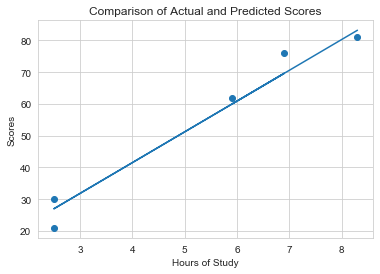

In [46]:
#Let's see the comparison of actual and predicted scores by plotting them
plt.scatter(x = X_test,
            y = y_test)
plt.plot(X_test, predicted_scores)
plt.title("Comparison of Actual and Predicted Scores")
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.show()

In [47]:
#Let's evaluate the model
mean_absolute_error(y_test, predicted_scores)

3.9207511902099244

##### The mean absolute error is quite small. So, we can say the model will perform good most of the time and there are less chances of getting error.